In [2]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [7]:
dataset=datasets.load_breast_cancer()


In [9]:
dataset["DESCR"]

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [13]:
dataset["feature_names"]


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [16]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [23]:
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=0)

In [24]:
clf=KNeighborsClassifier()

In [25]:
clf.fit(X_train,y_train)

KNeighborsClassifier()

In [26]:
clf.score(X_test,y_test)

0.9385964912280702

# Cross Validation

In [42]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [28]:
dataset=datasets.load_iris()


In [30]:
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=0)

In [34]:
clf=LinearRegression()

In [39]:
cross_val_score(clf,X_train,y_train,cv=3)
# (n_splits=5 by default)

array([0.86681987, 0.96539785, 0.93147262])

In [41]:
cross_val_score(clf,dataset.data,dataset.target,cv=3)
# as iris has 150 data , 50 each belongs to class 1,2,3
#so we are training on class 1,2 n testing on 3

array([0., 0., 0.])

In [44]:
cross_val_score(clf,dataset.data,dataset.target,cv=KFold(3,True,0))
#so to avoid this we shuffle the data

c:\users\mridu\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass shuffle=True, random_state=0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


array([0.90322728, 0.92527008, 0.94214064])

For k cross validation,smaller k value implies less variance.

which of the following is the default cross-validation splitting strategy used in crossvalscore of sklearn?

3 fold

use of cross validation?

to find best parameters' value for a classifier

selecting variables to include in a model

comparing predictors

selecting parameters in predict function

## To find best value of k

In [47]:
for i in range(1,26,2):
    clf=clf=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(clf,dataset.data,dataset.target)
    print(i,score.mean())

1 0.96
3 0.9666666666666668
5 0.9733333333333334
7 0.9800000000000001
9 0.9733333333333334
11 0.9800000000000001
13 0.9733333333333334
15 0.9666666666666668
17 0.9666666666666668
19 0.9666666666666668
21 0.9666666666666668
23 0.96
25 0.96


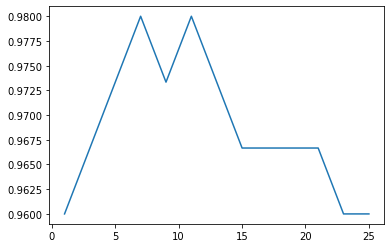

In [50]:
x_axis=[]
y_axis=[]
for i in range(1,26,2):
    clf=clf=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(clf,dataset.data,dataset.target)
    x_axis.append(i)
    y_axis.append(score.mean())
    
import matplotlib.pyplot as plt
plt.plot(x_axis,y_axis)

k = 7